In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd as xl
import seaborn as s 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('/content/drive/MyDrive/ML Assingments/diabetes.csv')
print(data.head)

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [4]:
X = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
y = data.Outcome

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=5)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [5]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.7857142857142857


Logestic Regression: AUROC = 0.849


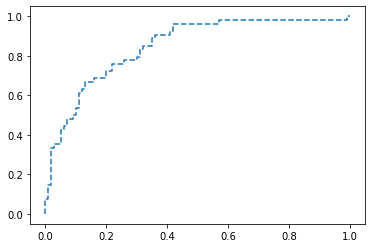

In [7]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
logreg_probs= logreg.predict_proba(X_test)
logreg_probs = logreg_probs[:, 1]
logreg_auc= roc_auc_score(y_test, logreg_probs)
print('Logestic Regression: AUROC = %.3f' %(logreg_auc))
logreg_fpr, logreg_tpr, _= roc_curve(y_test,logreg_probs)
plt.plot(logreg_fpr, logreg_tpr, linestyle='--', label='Logestic Regression(AUROC = %0.3f)' % logreg_auc)